<a href="https://colab.research.google.com/github/Antu0/Computational-Geoscience/blob/main/CG_Multi_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


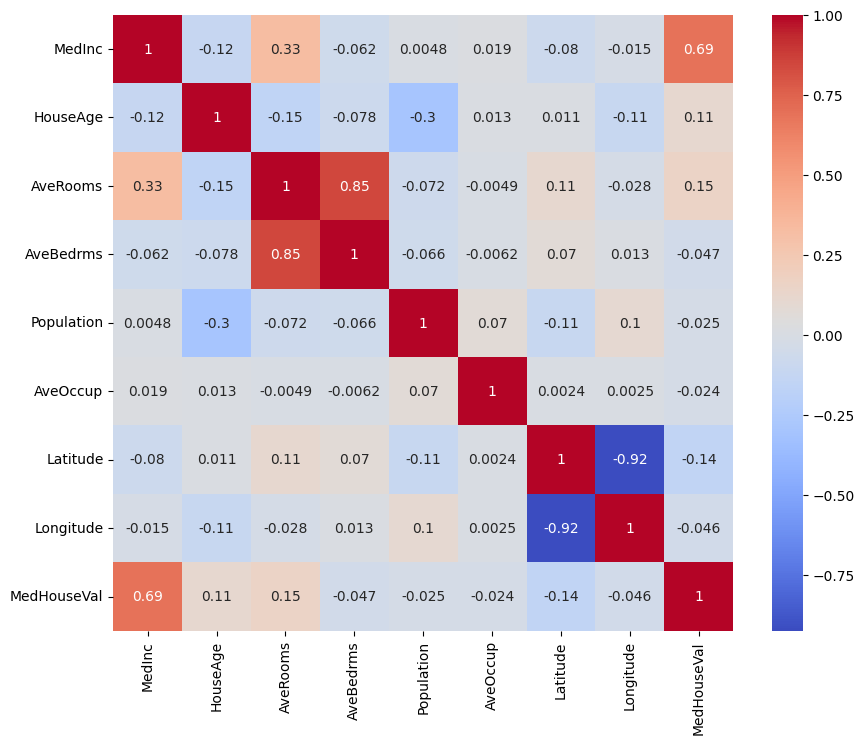

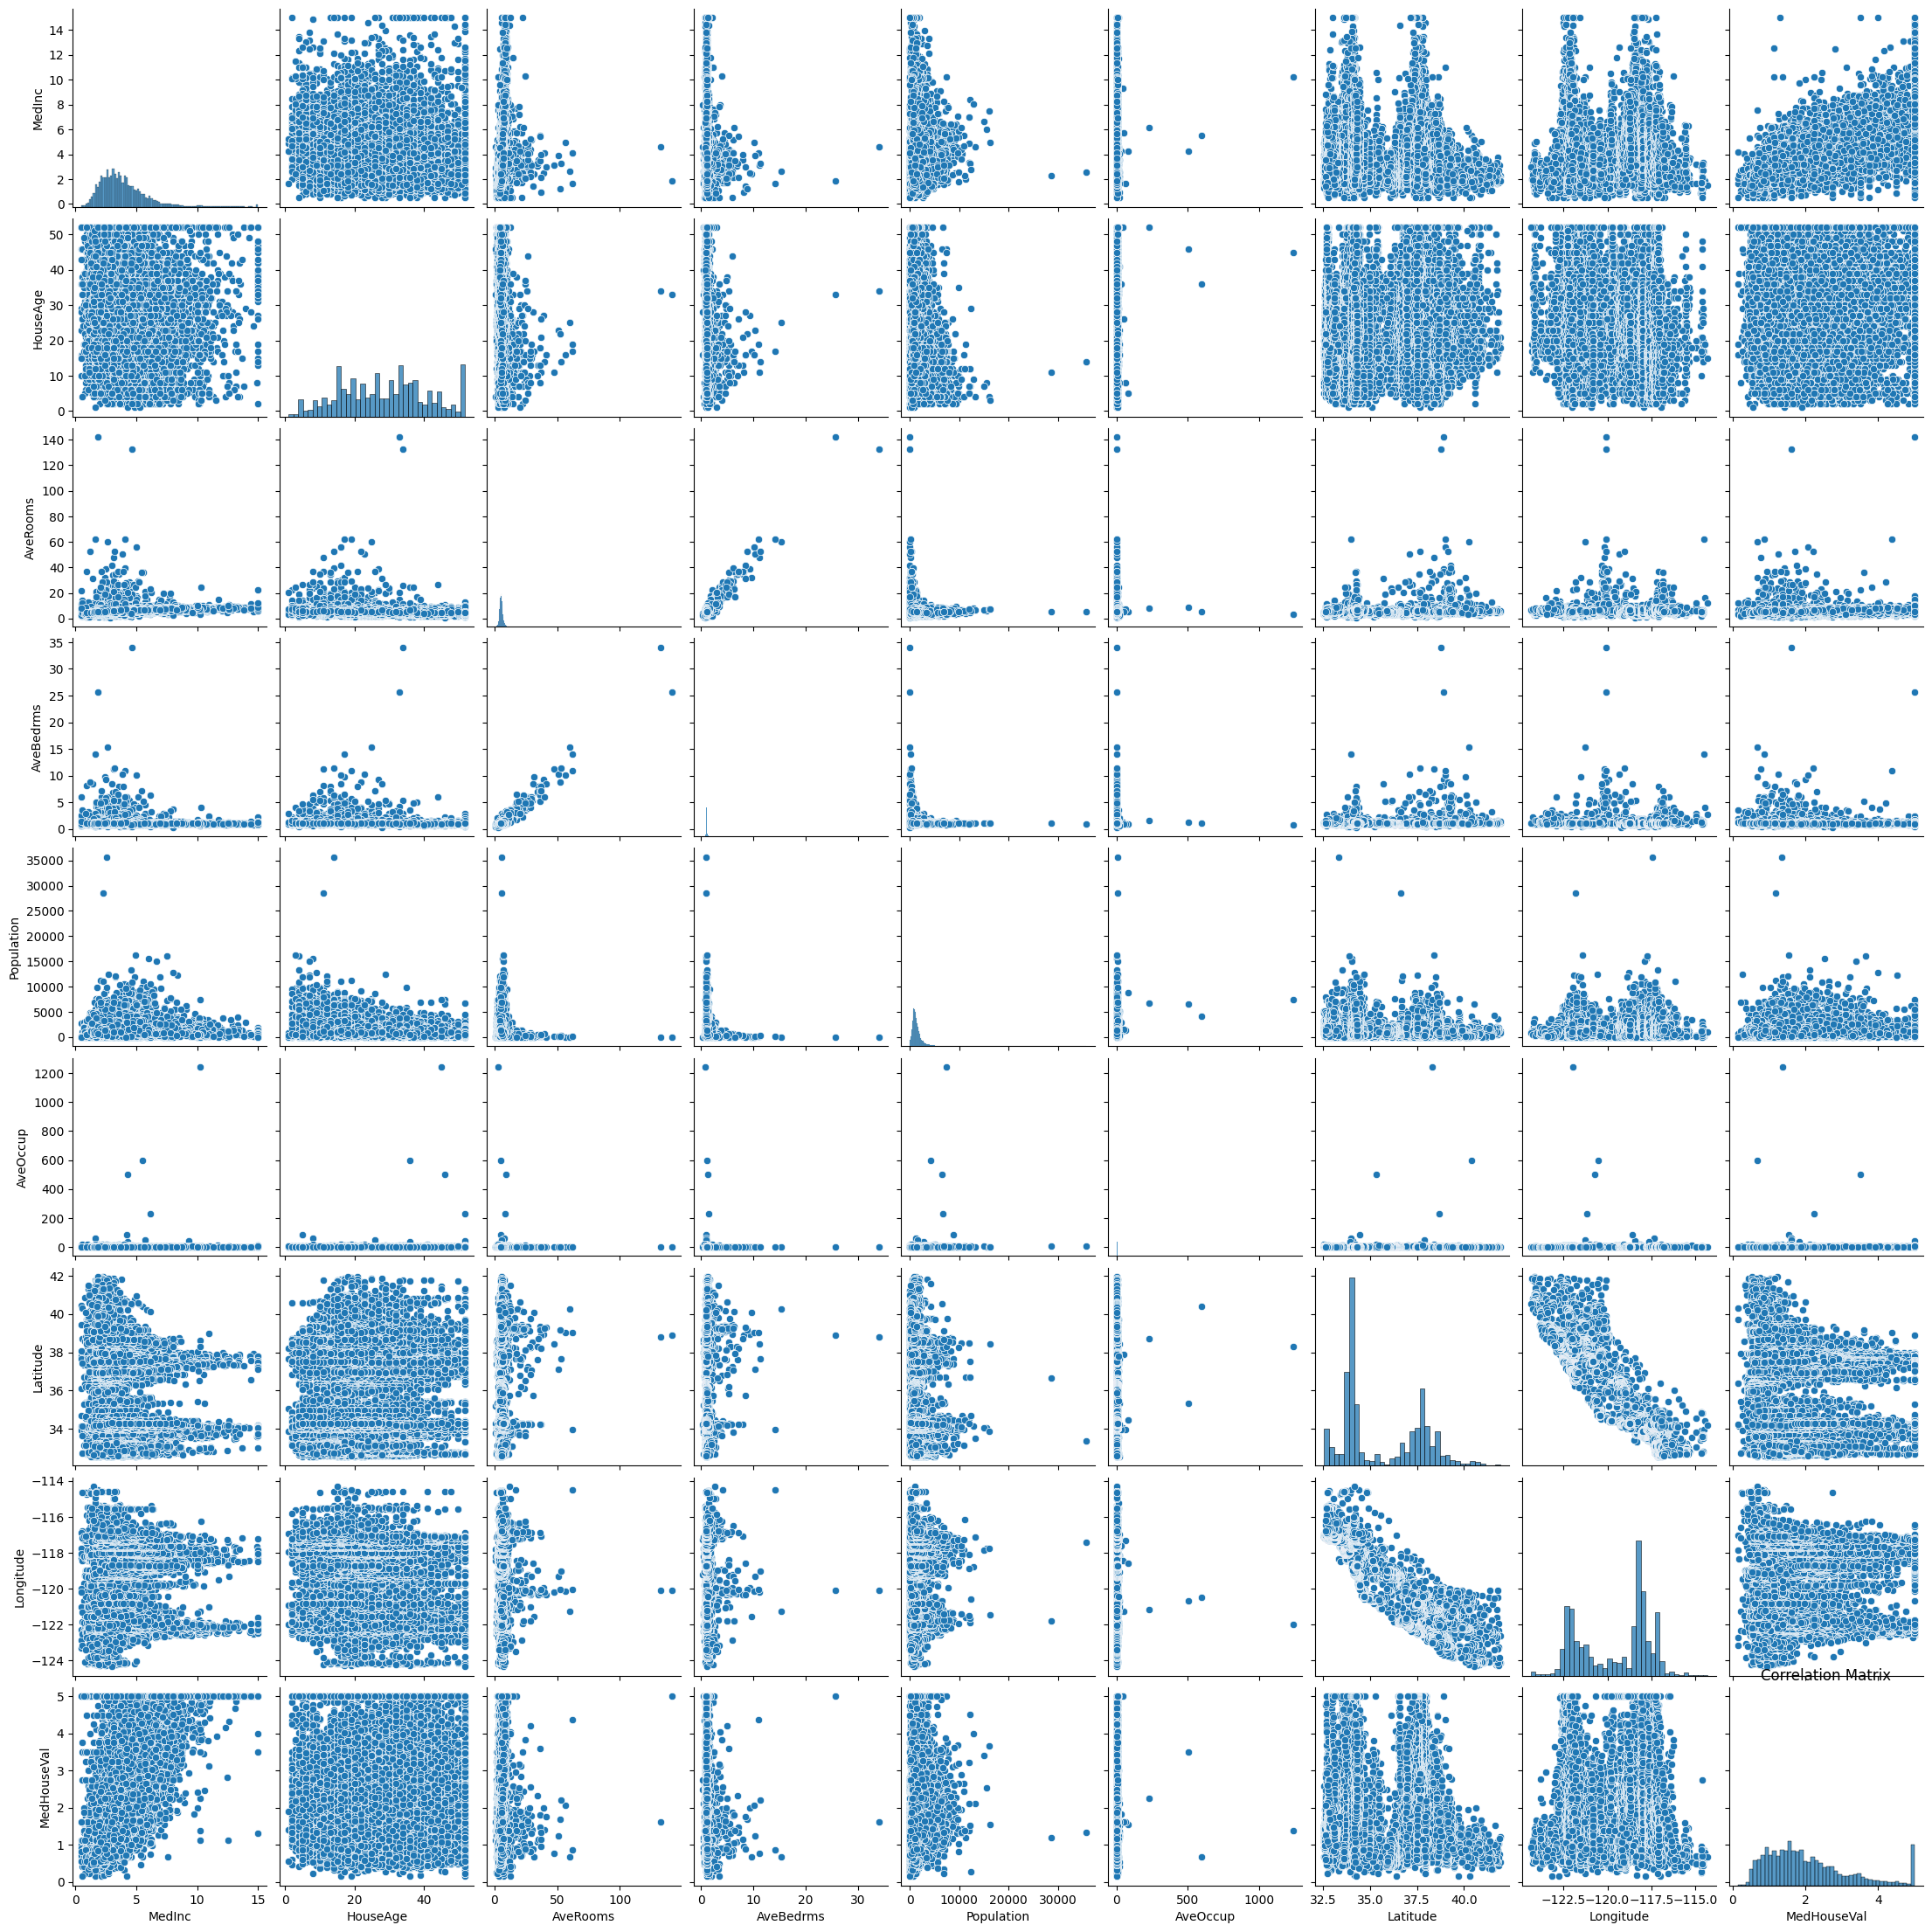

In [ ]:
housing_df = pd.read_csv("/content/drive/MyDrive/Antu /Python/Multiple Linear Regression/housing.csv")
housing_df.head()
print(housing_df.isnull().sum())
correlation_matrix = housing_df.corr()
print(correlation_matrix['MedHouseVal'])

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')
sns.pairplot(housing_df)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
selected_features = ['MedInc', 'AveRooms', 'AveOccup']
X = housing_df[selected_features]
y = housing_df['MedHouseVal']

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

# Print the scaled data
print(X_scaled)


[[ 2.34476576  0.62855945 -0.04959654]
 [ 2.33223796  0.32704136 -0.09251223]
 [ 1.7826994   1.15562047 -0.02584253]
 ...
 [-1.14259331 -0.09031802 -0.0717345 ]
 [-1.05458292 -0.04021111 -0.09122515]
 [-0.78012947 -0.07044252 -0.04368215]]


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# The 'LinearRegression' model is initialized and fitted to the training data.
model = LinearRegression()
model.fit(X_train, y_train)

# The model is used to predict the target variable for the test set.
y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 0.7006855912199322
R-squared: 0.46529243705233425


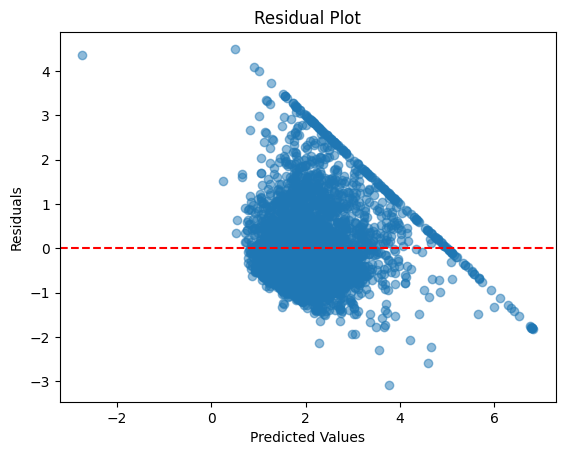

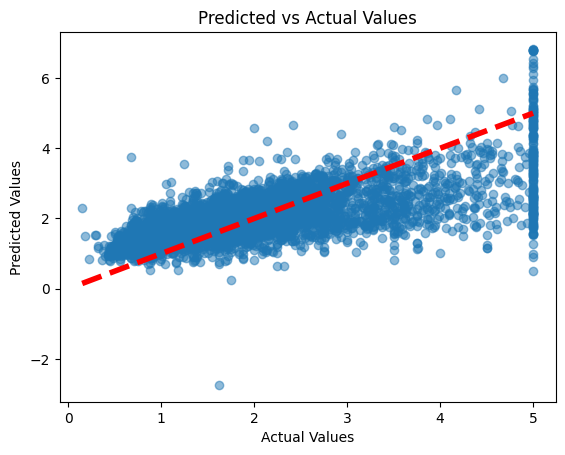

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# Predicted vs Actual Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.show()


                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     5173.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:10:52   Log-Likelihood:                -20354.
No. Observations:               16512   AIC:                         4.072e+04
Df Residuals:                   16508   BIC:                         4.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0679      0.006    320.074      0.0

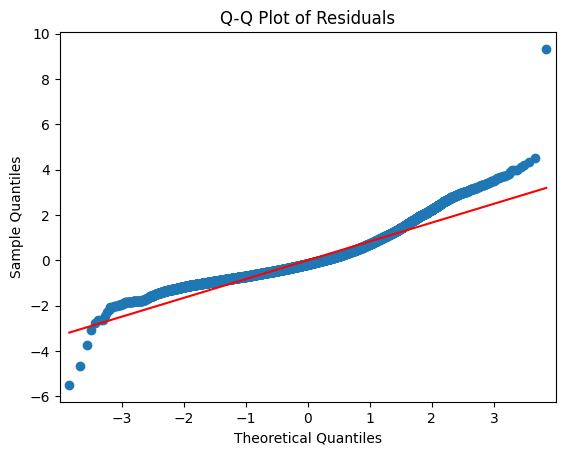

In [ ]:
# Add a constant to the model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

    Feature       VIF
0    MedInc  1.120166
1  AveRooms  1.119797
2  AveOccup  1.000488


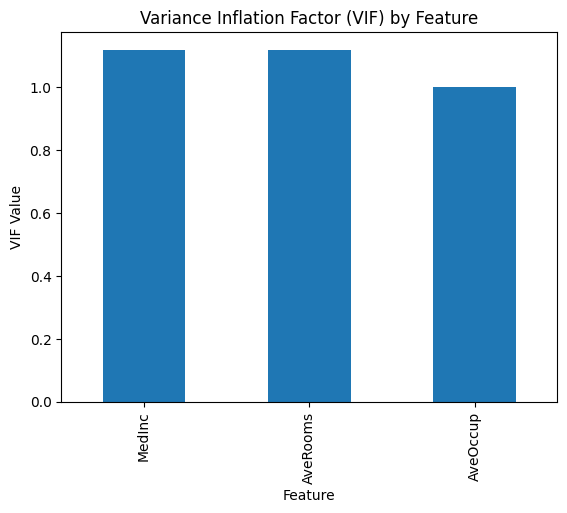

In [ ]:
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_features
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Bar Plot for VIF Values
vif_data.plot(kind='bar', x='Feature', y='VIF', legend=False)
plt.title('Variance Inflation Factor (VIF) by Feature')
plt.ylabel('VIF Value')
plt.show()

Cross-Validation Scores: [0.42854821 0.37096545 0.46910866 0.31191043 0.51269138]
Mean CV R^2: 0.41864482644550993


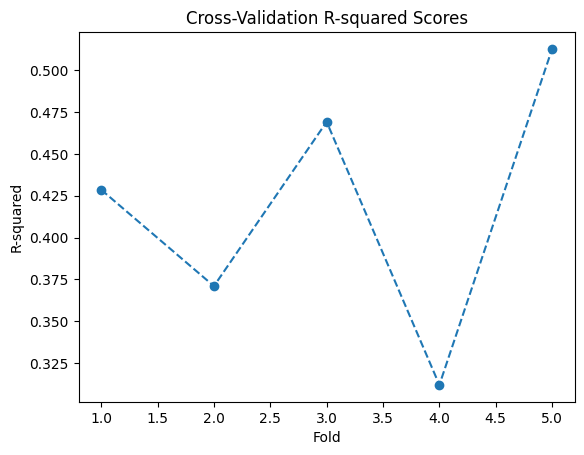

In [ ]:
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", scores)
print("Mean CV R^2:", scores.mean())

# Line Plot for Cross-Validation Scores
plt.plot(range(1, 6), scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('R-squared')
plt.title('Cross-Validation R-squared Scores')
plt.show()

Selected Features: [ True  True  True]


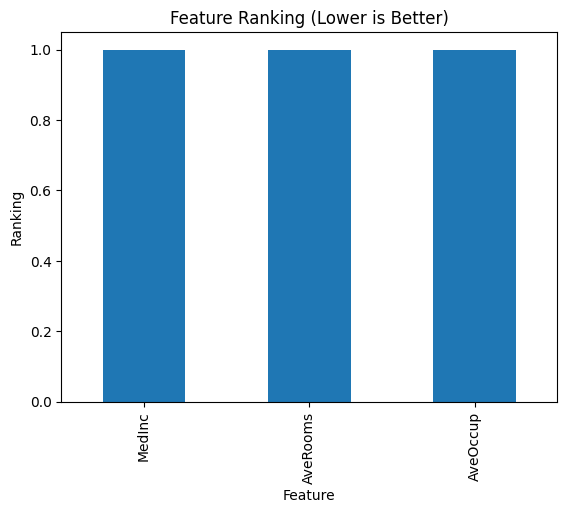

In [ ]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_scaled, y)
print("Selected Features:", rfe.support_)

# Bar Plot of Feature Rankings
feature_ranking = pd.DataFrame({
   'Feature': selected_features,
   'Ranking': rfe.ranking_
})
feature_ranking.sort_values(by='Ranking').plot(kind='bar', x='Feature', y='Ranking', legend=False)
plt.title('Feature Ranking (Lower is Better)')
plt.ylabel('Ranking')
plt.show()